# Gamma Distribution

The gamma distribution is a continuous probability distribution that models positively skewed data. Where the poisson distribution models positively skewed data that can only take on a finite/discrete set of values, the gamma distribution is used to model probabilities for variables that are measured on a continuous scale on the real number line. 

The gamma distribution is commonly used to model the time between independent events that occur at a fixed rate. Examples of uses of the gamma distribution would include things like modeling waiting times, time elapsed before failure, time until a specified number of events have occured (e.g. 3 accidents). 

The gamma distribution is defined using three parameters. These are the threshold (also known as the loc), the shape, and the scale. 
- The threshold (loc): Specifies the smallest value in the distribution. This is the starting value. All other values are greater than the threshold. The default value for the threshold in most programming languages is zero, and when adjusted this shifts the distribution to the left or right, depending on whether the threshold is set to a negative or positive value. 
- The shape: This parameter specifies the number of events you are modeling. For example, you may want to evaluate the probability for the time elapsed until 2 traffic accidents have been observed. In this case the shape parameter would equal 2. The shape must be a positive value but it does not have to be an integer and can take on floating point/ decimal values. In formulas for the gamma distribution, such as the pdf, the shape is usually denoted using the Greek letter alpha (a). Increasing the value of the shape (a) causes time elapsed to increase and widens the distribution. This makes intuitive sense as we would expect elapsed time to increase if we are modeling the occurrence or more events. With high shape values the gamma starts to approximate the normal distribution in appearance. 
- The scale: This parameter specifies the mean time between events. This is often denoted using the Greek letter Beta (B) in equations and formulas for the gamma distribution. This can be set to a value to represent whatever the relevant unit of time is for the model, such as seconds, minutes, hours, days, etc. For example, if the time between accidents is measured in hours and there are on average 5 hours between accidents the scale parameter for the model would be 5. The scale can also be set as a rate, referred to using the Greek letter lambda. Lambda is also the parameter used for the mean rate at which events occur in the poisson distribution. The scale Beta = 1/ lambda and, as it is the reciprocal, lambda = 1/ Beta. So, for example if our Beta was an accident every 5 hours, our lambda rate would be: 1/beta = lambda (1/5 = 0.20). This is like saying 1/5 of an accident happens every hour. It is obviously not possible to have 1/5 of an accident but that is the average rate on a continuous scale and means that we expect to see one accident every 5 hours. Different scale values adjust the shape of the gamma distribution. When the scale value is small, we see a distribution with a high peak on the left of the distribution and a long positively skewed tail. Higher values of the scale cause the height of the distribution to lower and more of the distribution to expand to the right hand of the distribution. As time is measured on the x-axis for the gamma, the higher the scale value the longer the time elapsed between events, so the more we would expect the distribution to shift to the right. 


In this notebook I will simulate data that follows a gamma distribution, visualise the shape of the distribution, and investigate properties of the distribution using the Probability Density Function (pdf) and Cumulative Distribution Function (cdf). 

In [1]:
# Importing key software libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
# Generating some data that follows a gamma distribution. 
# Using the scipy stats gamma method and invoke the random variates method (rvs).
# The arguments are: stats.gamma.rvs(a, loc = None, scale = None, size = None , random_state = None).
# Here I am going to use a = 3, loc = 0, scale = 1, size = 10,000, and random_state = 1. 
# Random _state sets the random seed so the data can be replicated. 

gam_var = stats.gamma.rvs(3, loc = 0, scale = 1, size = 10000, random_state = 1)

<AxesSubplot:ylabel='Count'>

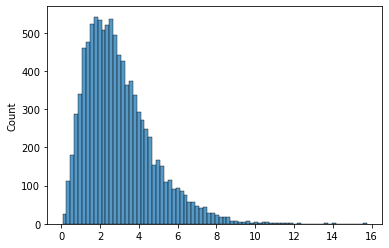

In [3]:
# Plotting the distibution of the data using a seaborn histogram plot. 

sns.histplot(gam_var)

We can see that the data generated follows a gamma distribution for the parameters we specified. It is highly peaked on the left of the distribution and has a long positively skewed tail. 

As this is randomly generated data, the values for the parameters won't be exactly those we specified as arguments but will be fairly close. We can check how close using the scipy fit method. 

In [4]:
# Using the scipy fit() method to obtain the actual parameters for our data (gam_var) and printing those values.

[a_fit, loc_fit, scale_fit] = stats.gamma.fit(gam_var)

print("Shape (a):", a_fit)
print("Loc (threshold):", loc_fit)
print("Scale (rate):", scale_fit)

Shape (a): 2.943635489608041
Loc (threshold): 0.018079707246136584
Scale (rate): 1.012185188820387


We can see above that, although not exact, the values of the paramters are close to those specified when we generated the data. 
The shape (a) is 2.94 (we specified a value of 3), the loc is 0.018 (we specified a value of 0), and the scale is 1.01 (we specified a value of 1). 

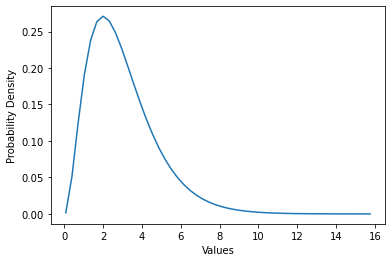

In [5]:
# Next we can obtain a plot of the data with the fitted values above as parameters and obtain the pdf so we can see
# the pdf line for our data. This will convert our y-axis values from frequency counts for occurrences, which they are
# on the above histogram, and give the actual probability densities on the y-axis. 

x = np.linspace(np.min(gam_var), np.max(gam_var))

plt.plot(x, stats.gamma.pdf(x, a_fit, loc = loc_fit, scale = scale_fit))

plt.xlabel("Values")
plt.ylabel("Probability Density")

plt.show()


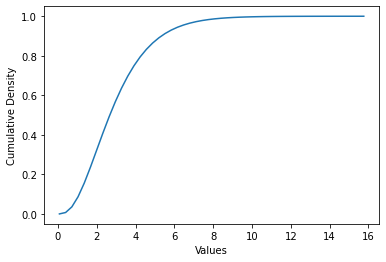

In [6]:
# Plotting the cdf for the data.Note the only change here is invoking the cdf method 

x = np.linspace(np.min(gam_var), np.max(gam_var))

plt.plot(x, stats.gamma.cdf(x, a_fit, loc = loc_fit, scale = scale_fit))

plt.xlabel("Values")
plt.ylabel("Cumulative Density")

plt.show()

Next, we can investigate actual probabilities of events using the pdf and cdf for our data.

In [7]:
# We can use the pdf to obtain the probability of observing x number of accidents with our parameters. 
# To do this we call the scipy pdf method and specify the value of x we are interested in as well as the shape, the loc, 
# and the scale (x, a, loc = , scale = ). Here, I will use the values from our data saved as the objects a_fit, loc_fit
# and scale_fit. 
# I will set the x value (number of events observed) to 4. 

stats.gamma.pdf(4, a_fit, loc = loc_fit, scale = scale_fit)

0.1457653841194315

We can see that there is about a 14.5% chance of observing 4 events (accidents), when the elapsed time (a) is set to model 3 accidents and the rate (scale) is 1 accident per unit of time. 

In [8]:
stats.gamma.pdf(1.5, a_fit, loc = loc_fit, scale = scale_fit)

0.25233645866408566

If we change the x value we are interested in to 1.5 accidents, we see the probability of observing fewer accidents (when the elapsed time (a) is set to model 3 accidents and the rate (scale) is 1 accident per unit of time) is higher with about a 25% probability of seeing this many occurrences.

In [9]:
# We can also use the cdf to find out the probability of observing a given number of accidents or fewer with our data 
# parameters. The scipy cdf method takes the same arguments as the pdf above.

stats.gamma.cdf(4, a_fit, loc = loc_fit, scale = scale_fit)

0.7622826793696598

Above, we can see that the cumulative probability of seeing 4 or fewer occurrences, in a unit of elapsed time, is about 76%.

In [10]:
# The cdf for 1.5 occurrences. 
stats.gamma.cdf(1.5, a_fit, loc = loc_fit, scale = scale_fit)

0.1924882515740937

This is a lower probability (19%) of observing 1.5 accidents at the parameters specified.

#### Summary:

- The gamma distribution is a continuous probability distribution used to model right (positively) skewed data. 
- It models real world events where we are interested in the time elapsed between the occurrence of independent events that occur at a fixed rate. 
- The parameters for the gamma distribution are the shape (a), the loc (threshold), and the scale (B = 1/ lambda). 